<a href="https://colab.research.google.com/github/Bishawa/YesBankStockClosingPricePrediction/blob/main/YesBankStockClosingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
file = '/content/drive/MyDrive/AlmaBetter/Module 4 ML /Regression ML capstone project /data_YesBank_StockPrices.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df_yes = df.copy()

## We have uploaded the dataset and the necessary libraries, so now we will begin the EDA for the available dataset

In [5]:
df_yes.head(20)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


- We can check that we have five columns out of which 'Close' is our target or Dependent variable
- Date is unique for all the rows 
- So our dependent variables are 'Open', 'High', 'Low'
### So, lets create separate variables for independent and dependent variables

In [7]:
# Checking the shape of the dataset 
df_yes.shape

(185, 5)

In [8]:
# checking the information about the data 
df_yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### After checking the info of the dataset we can say that there is no null values in the dataset
- But we will cross check it by checking the unique values form each column 

In [9]:
df_yes['Open'].unique()

array([ 13.  ,  12.58,  13.48,  13.2 ,  13.35,  13.49,  13.68,  15.5 ,
        16.2 ,  20.56,  19.8 ,  18.2 ,  16.  ,  15.9 ,  18.  ,  18.78,
        22.8 ,  25.4 ,  27.4 ,  30.2 ,  29.3 ,  27.  ,  30.66,  33.89,
        35.98,  37.5 ,  37.4 ,  41.8 ,  44.4 ,  46.4 ,  49.99,  50.88,
        48.9 ,  33.9 ,  34.3 ,  31.22,  22.85,  25.  ,  26.68,  24.6 ,
        14.79,  12.4 ,  15.28,  12.19,  10.  ,  10.04,  15.94,  25.6 ,
        29.7 ,  31.98,  33.8 ,  41.2 ,  46.58,  50.98,  53.6 ,  49.  ,
        47.8 ,  50.67,  56.94,  56.7 ,  53.55,  59.4 ,  62.8 ,  70.9 ,
        72.2 ,  61.8 ,  62.98,  53.  ,  51.84,  62.  ,  61.26,  60.4 ,
        63.  ,  62.9 ,  56.  ,  53.8 ,  62.2 ,  57.  ,  47.92,  65.9 ,
        69.  ,  73.62,  70.4 ,  65.45,  68.15,  73.  ,  66.2 ,  76.4 ,
        82.54,  89.2 ,  93.2 , 104.41,  94.  ,  85.7 , 100.99,  99.  ,
        92.4 ,  66.  ,  49.2 ,  58.  ,  74.  ,  74.4 ,  74.74,  61.54,
        60.52,  83.45,  88.8 , 114.8 , 108.43, 107.4 , 114.6 , 112.1 ,
      

In [11]:
df_yes['High'].unique()

array([ 14.  ,  14.88,  14.87,  14.47,  13.88,  14.44,  17.16,  16.97,
        20.95,  20.8 ,  21.8 ,  18.4 ,  17.2 ,  18.6 ,  18.88,  24.2 ,
        28.47,  29.66,  34.16,  32.6 ,  31.58,  31.99,  36.14,  36.38,
        41.04,  39.  ,  41.75,  47.3 ,  50.98,  54.  ,  55.56,  53.97,
        48.9 ,  35.8 ,  36.88,  32.22,  30.5 ,  28.98,  29.8 ,  25.  ,
        17.8 ,  16.56,  18.34,  12.5 ,  11.24,  17.51,  28.84,  31.08,
        33.16,  35.18,  41.3 ,  52.34,  54.98,  55.67,  57.58,  51.48,
        52.06,  59.48,  58.08,  59.9 ,  60.94,  68.88,  71.74,  76.  ,
        77.6 ,  68.36,  63.54,  57.69,  65.2 ,  68.26,  61.68,  63.39,
        68.  ,  63.96,  60.08,  64.8 ,  63.7 ,  59.8 ,  66.5 ,  74.8 ,
        77.88,  76.1 ,  70.59,  70.6 ,  73.19,  74.78,  77.69,  84.2 ,
        89.6 ,  95.  , 107.  , 107.8 , 100.15, 101.8 , 109.43, 102.94,
       100.4 ,  67.81,  78.94,  76.44,  77.27,  83.  ,  76.35,  62.7 ,
        83.36,  94.98, 117.6 , 117.57, 114.46, 118.69, 126.85, 137.8 ,
      

In [12]:
df_yes['Low'].unique()

array([ 11.25,  12.55,  12.27,  12.4 ,  12.88,  13.  ,  13.58,  15.4 ,
        16.02,  18.02,  15.8 ,  13.4 ,  13.82,  15.7 ,  16.8 ,  18.5 ,
        21.4 ,  24.4 ,  27.  ,  26.8 ,  23.31,  26.2 ,  29.11,  30.4 ,
        35.02,  30.2 ,  35.3 ,  33.6 ,  40.02,  45.  ,  30.24,  44.4 ,
        24.11,  28.51,  30.03,  22.62,  20.4 ,  24.62,  21.7 ,  11.01,
        11.13,  11.48,   9.9 ,   8.16,   9.94,  14.76,  23.  ,  24.83,
        29.  ,  32.  ,  36.8 ,  42.84,  48.6 ,  46.42,  44.6 ,  47.3 ,
        48.8 ,  50.66,  52.6 ,  53.02,  59.01,  62.51,  68.21,  58.  ,
        55.44,  49.39,  46.71,  50.8 ,  60.5 ,  54.5 ,  54.8 ,  61.36,
        50.51,  51.2 ,  48.1 ,  52.04,  47.4 ,  46.11,  63.6 ,  66.2 ,
        69.11,  58.85,  62.14,  67.57,  65.27,  64.46,  75.6 ,  82.22,
        88.01,  93.2 ,  93.4 ,  83.42,  83.43,  97.2 ,  87.15,  57.71,
        43.22,  44.8 ,  56.08,  64.65,  71.63,  60.8 ,  58.42,  60.34,
        80.8 ,  86.98, 101.62, 100.44, 103.31, 107.18, 109.2 , 132.44,
      

In [15]:
df_yes['Close'].unique()

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

### After cross checking the values we can see that there in no NULL values in the columns 

In [20]:
# Checking for numerical columns
numerical_col = df_yes.describe().columns

In [21]:
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

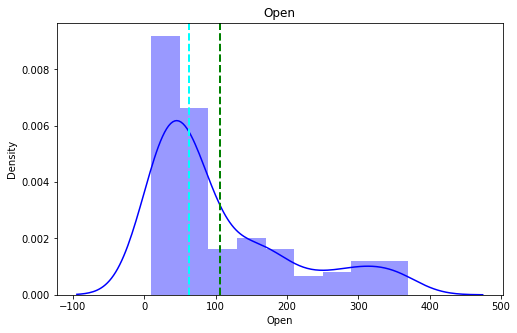

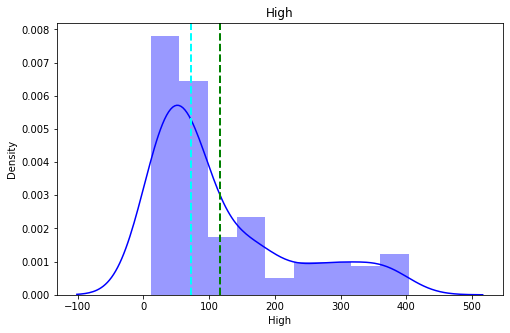

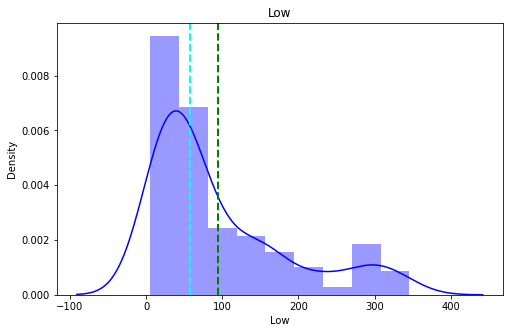

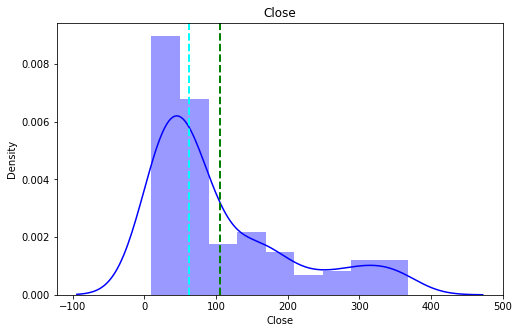

In [42]:
# Creating the graph for the numerical column along with the mean and median so that we can also check the skewness 
for i in numerical_col:
  fig = plt.figure(figsize=(8,5))
  ax = fig.gca()
  features = df_yes[i]
  label = df_yes['Close']
  # features.hist(bins = 50,ax = ax,color = 'blue')
  sns.distplot(features, color= 'blue')
  ax.axvline(features.mean(),color = 'green',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)
plt.show()

### We can see that all columns have Right Skewness and also there are outliers present in the data

### Next we want to convert the date column into a date time format as we can see from the info that date column is of object type

In [26]:
from datetime import datetime
df_yes['Date'] = pd.to_datetime(df_yes['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [27]:
# Lets recheck the date column type
# We can check that the date column is being converted to datetime64
df_yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


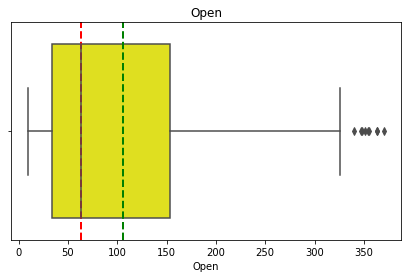

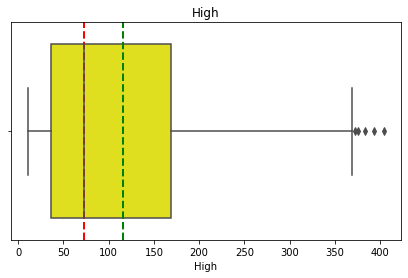

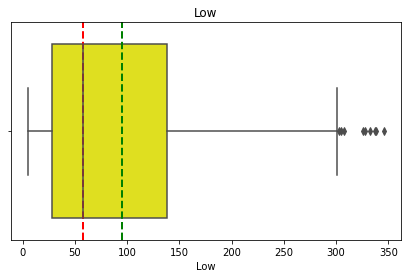

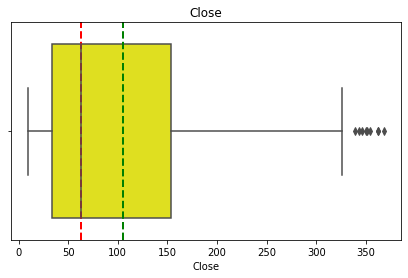

In [44]:
# Now craete a boxplot to check the outliers 
for i in numerical_col:
  fig = plt.figure(figsize=(7, 4))
  ax = fig.gca()
  features = df_yes[i]
  label = df_yes['Close']
  sns.boxplot(x=features ,color= 'yellow')
  ax.axvline(features.mean(),color = 'green',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'red',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)
plt.show()

- All the boxplot shows the presence of outliers and also we gap between the mean and median lines and the median being on the left side shows that the columns are right skewed 

### So to correct the skewness we will try a log transformation 

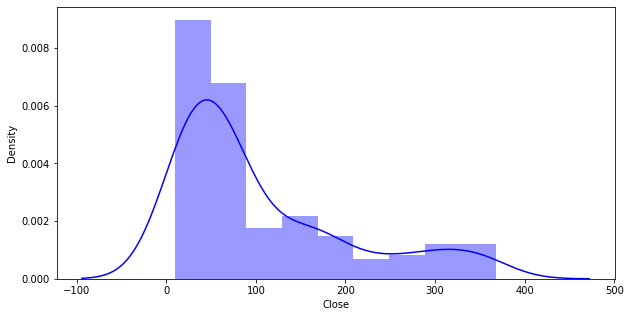

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df_yes['Close'],color='blue')
plt.show()

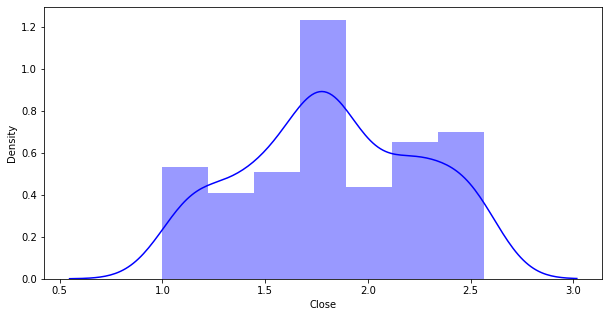

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df_yes['Close']),color='blue')
plt.show()

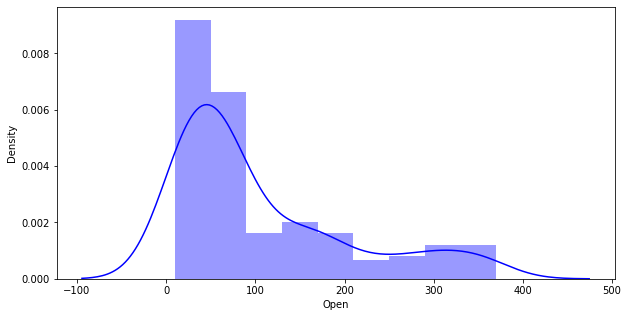

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(df_yes['Open'],color='blue')
plt.show()

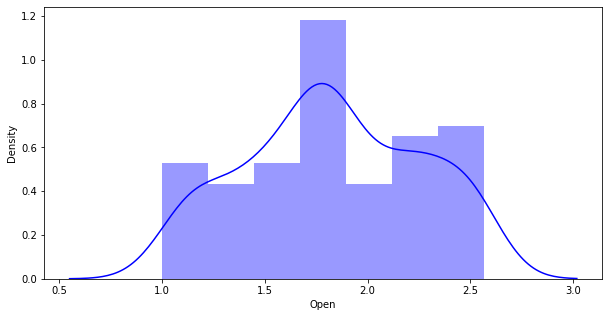

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df_yes['Open']),color='blue')
plt.show()

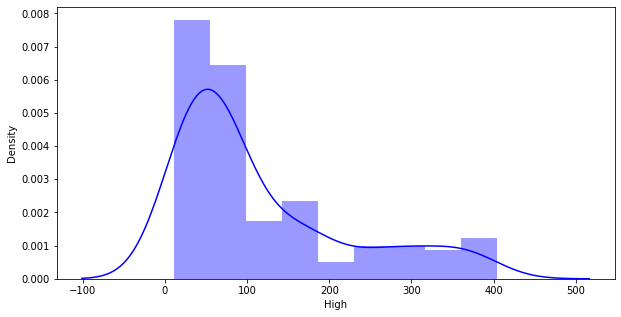

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(df_yes['High'],color='blue')
plt.show()

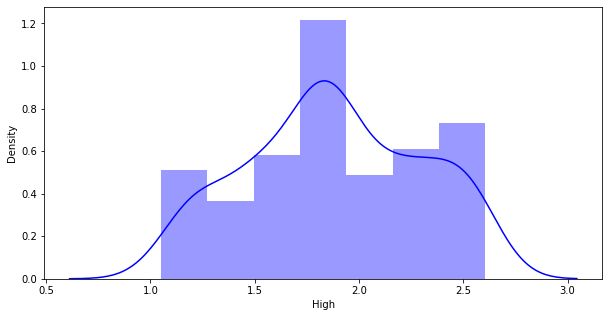

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df_yes['High']),color='blue')
plt.show()

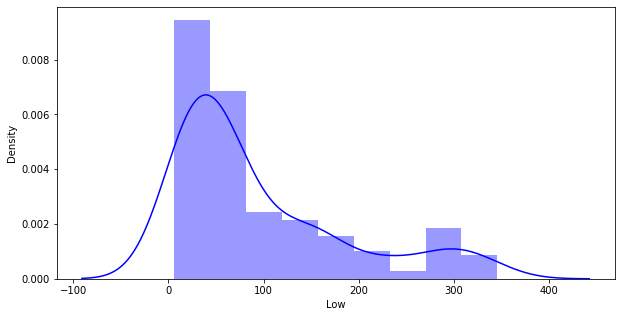

In [53]:
plt.figure(figsize=(10,5))
sns.distplot(df_yes['Low'],color='blue')
plt.show()

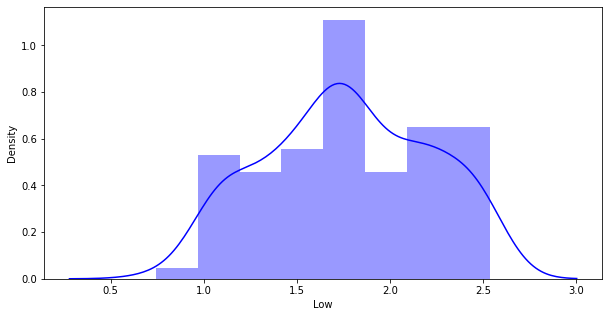

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df_yes['Low']),color='blue')
plt.show()

### After the log transformation we can see that the dataset is very much balanced and is close to a normal distribution 

## Next we are going to check the correlation between all the variables 

In [54]:
correlation = df_yes.corr()

In [62]:
correlation

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


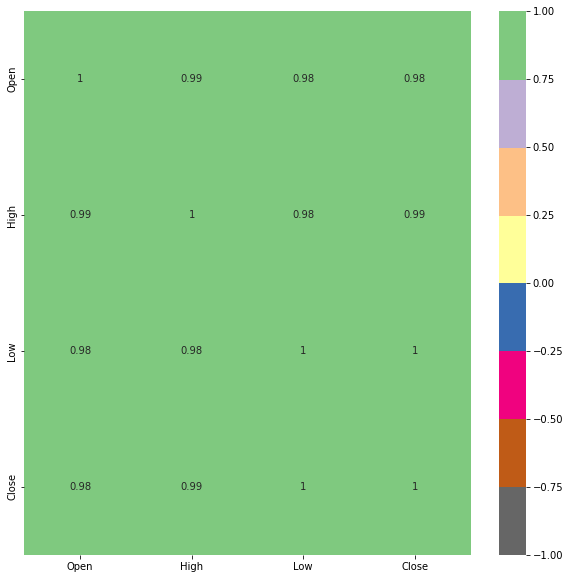

In [61]:
plt.figure(figsize = (10,10))
sns.heatmap(np.abs(correlation), annot=True, vmax=1, vmin=-1, cmap='Accent_r')
plt.show()

## We can see that all the columns are hihly correlated to each other 
